## Plot Results

Simulation code for plotting the results from the numerical experiments reported in the paper:  
**Vidit Saxena and Joakim Jaldén,"Bayesian Link Adaptation under a BLER Target", In 2020 IEEE 21st International Workshop on Signal Processing Advances in Wireless Communications (SPAWC) on May 26-29, 2020.** 

### Import Dependencies

In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 30, 
                     'lines.linewidth' : 3,
                     'lines.markersize': 20})

### Load Numerical Data from Simulations

In [2]:
#filename = 'RESULT_SNR_15_TARGET_0.1_DELAY_0'
#filename = 'RESULT_SNR_15_TARGET_0.3_DELAY_0'

#filename = 'TEST'
filename = 'TEST_wei_nonstationary'

data = np.load(filename + '.npy', allow_pickle=True)[()]

In [8]:
olla_mcs, olla_ack, olla_tput = data['olla']
bayesla_mcs, bayesla_ack, bayesla_tput = data['bayesla']
Trackbayesla_mcs, Trackbayesla_ack, Trackbayesla_tput = data['Trackbayesla']
dts_mcs, dts_ack, dts_tput = data['dts']
ucb1_mcs, ucb1_ack, ucb1_tput = data['ucb1']

In [4]:
plt.rcParams.update({'font.size': 30, 
                     'lines.linewidth' : 5,
                     'lines.markersize': 20})

# USER-DEFINED: Down-sampling interval for cleaner plots
interval = 10

plt_filename_prefix = 'plots/' + '_'.join( filename.split('.'))

### Average realized throughput across links with respect to transmission instances

Text(0, 0.5, 'Average Tput [bps / Hz]')

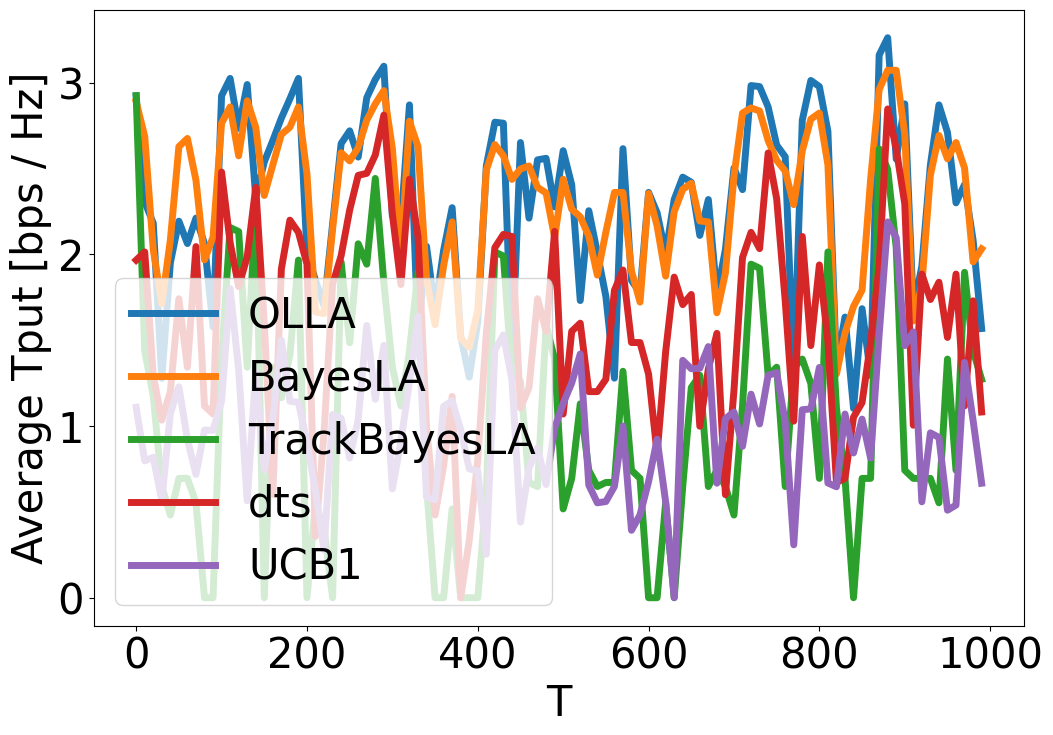

In [9]:
plt.figure( figsize = [12, 8])

x = np.arange( int( np.array(olla_tput).shape[1] / interval ) ) * interval

plt.plot(x, np.mean(np.array(olla_tput)[:, ::interval] / (72 * 15), axis=0))
plt.plot(x, np.mean(np.array(bayesla_tput)[:, ::interval] / (72 * 15), axis=0))
plt.plot(x, np.mean(np.array(Trackbayesla_tput)[:, ::interval] / (72 * 15), axis=0))
plt.plot(x, np.mean(np.array(dts_tput)[:, ::interval] / (72 * 15), axis=0))
plt.plot(x, np.mean(np.array(ucb1_tput)[:, ::interval] / (72 * 15), axis=0))

plt.legend(['OLLA', 'BayesLA', 'TrackBayesLA', 'dts', 'UCB1'])

plt.xlabel('T')
plt.ylabel('Average Tput [bps / Hz]')

#plt.savefig(plt_filename_prefix + '_tput.eps', bbox_inches='tight')
#plt.savefig(plt_filename_prefix + '_tput.png', bbox_inches='tight')

Text(0, 0.5, 'Average Tput rel to OLLA [bps / Hz]')

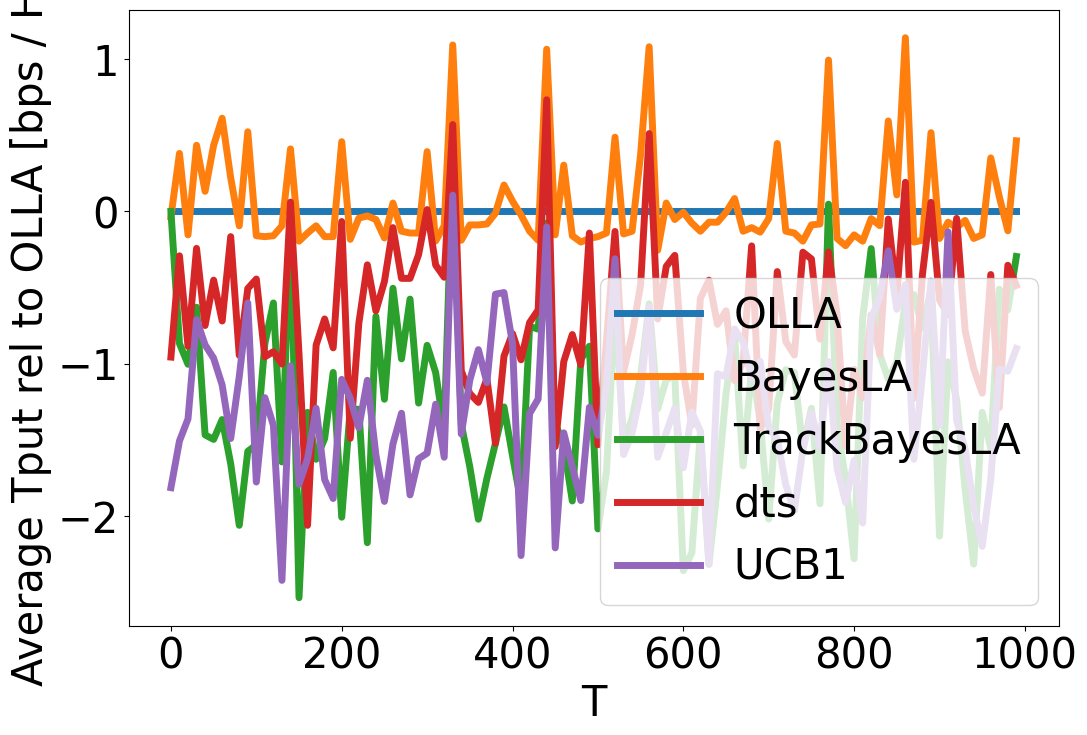

In [11]:
plt.figure( figsize = [12, 8])

x = np.arange( int( np.array(olla_tput).shape[1] / interval ) ) * interval

olla = np.mean(np.array(olla_tput)[:, ::interval] / (72 * 15), axis=0)
bayesla = np.mean(np.array(bayesla_tput)[:, ::interval] / (72 * 15), axis=0)
trackbayesla = np.mean(np.array(Trackbayesla_tput)[:, ::interval] / (72 * 15), axis=0)
dts = np.mean(np.array(dts_tput)[:, ::interval] / (72 * 15), axis=0)
ucb1 = np.mean(np.array(ucb1_tput)[:, ::interval] / (72 * 15), axis=0)

plt.plot(x, olla - olla)
plt.plot(x, bayesla - olla)
plt.plot(x, trackbayesla - olla)
plt.plot(x, dts - olla)
plt.plot(x, ucb1 - olla)

plt.legend(['OLLA', 'BayesLA', 'TrackBayesLA', 'dts', 'UCB1'])

plt.xlabel('T')
# plt.ylabel('Average Tput [bps / Hz]')
plt.ylabel('Average Tput rel to OLLA [bps / Hz]')

#plt.savefig(plt_filename_prefix + '_tput.eps', bbox_inches='tight')
#plt.savefig(plt_filename_prefix + '_tput.png', bbox_inches='tight')

### Average realized BLER across links with respect to transmission instances

Text(0, 0.5, 'BLER')

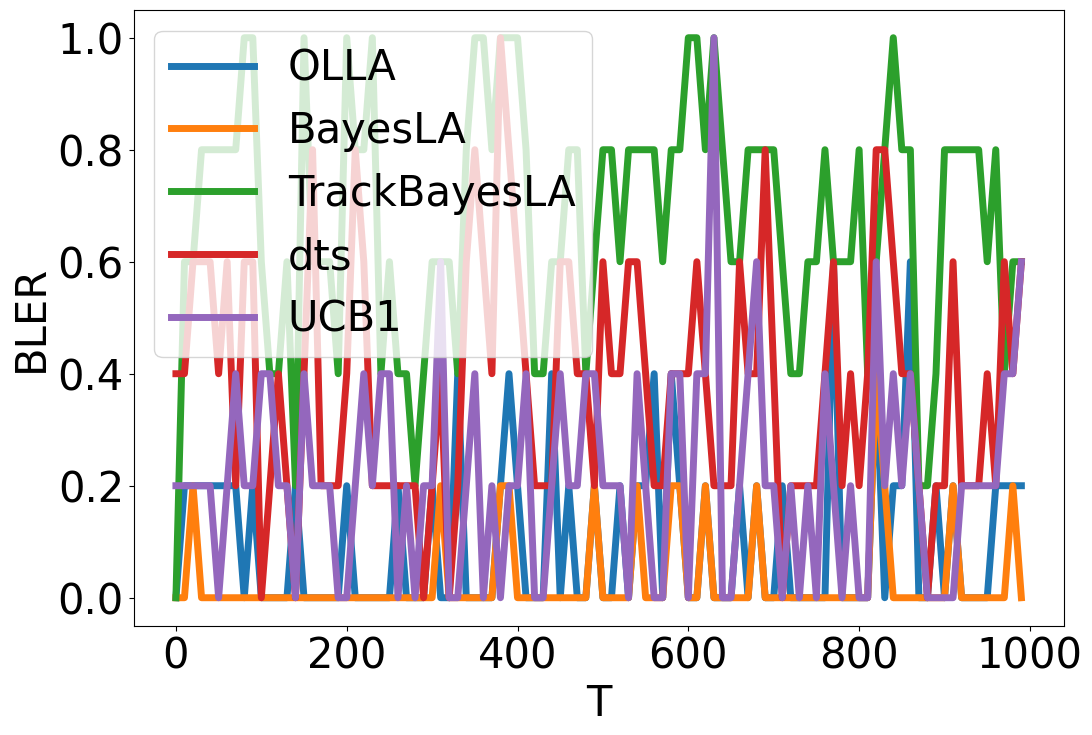

In [12]:
plt.figure( figsize = [12, 8])

plt.plot(x, 1.0 - np.mean(np.array(olla_ack)[:, ::interval], axis=0))
plt.plot(x, 1.0 - np.mean(np.array(bayesla_ack)[:, ::interval], axis=0))
plt.plot(x, 1.0 - np.mean(np.array(Trackbayesla_ack)[:, ::interval], axis=0))
plt.plot(x, 1.0 - np.mean(np.array(dts_ack)[:, ::interval], axis=0))
plt.plot(x, 1.0 - np.mean(np.array(ucb1_ack)[:, ::interval], axis=0))

plt.legend(['OLLA', 'BayesLA', 'TrackBayesLA', 'dts', 'UCB1'])

plt.xlabel('T')
plt.ylabel('BLER')

#plt.savefig(plt_filename_prefix + '_bler.eps', bbox_inches='tight')
#plt.savefig(plt_filename_prefix + '_bler.png', bbox_inches='tight')